- Investigate countries and specifically business types / sizes to promote further into
- Fresha takes a 2.29% + 20 cent commission on every transaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> 1. Cleaning

The most immediate way to drive value would be by expanding Fresha's roster of business partners. The data is limited, however we can use relative values within the dataset to get an approximation of potential areas for expansion/ acquisition.

My aim: Because the data is so limited, most of this presentation will be using very simple approximations, however, the goal is to be able to convey some stories with potential for further investigation, given evidence in the dataset.

In [2]:
data = pd.read_csv(r"C:\Users\ibarn\Downloads\Fresha Dataset.csv")

In [3]:
data.head(10)

,BUSINESS_TYPE,STAFF,COUNTRY_CODE,MONTHLY_REVENUE
0,Nail Salon,Individual,GB,1646.567381
1,Hair Salon,Individual,GB,13600.083130
2,Massage,Individual,GB,4118.980504
3,Nail Salon,Individual,US,2068.142086
4,Eyebrows & Lashes,Individual,AU,1735.191196
5,Nail Salon,Individual,IE,2715.901299
6,Nail Salon,2-5 Staff,GB,2207.510619
7,Eyebrows & Lashes,2-5 Staff,US,9873.683955
8,Nail Salon,Individual,GB,3289.039762
9,Massage,2-5 Staff,GB,4401.252669


In [4]:
data.shape

(3000, 4)

In [5]:
data.dtypes

BUSINESS_TYPE       object
STAFF               object
COUNTRY_CODE        object
MONTHLY_REVENUE    float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BUSINESS_TYPE    3000 non-null   object 
 1   STAFF            2999 non-null   object 
 2   COUNTRY_CODE     3000 non-null   object 
 3   MONTHLY_REVENUE  3000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 93.9+ KB


In [7]:
null_value = data[data["STAFF"].isnull()]
null_value

,BUSINESS_TYPE,STAFF,COUNTRY_CODE,MONTHLY_REVENUE
1510,Unknown,NaN,GB,913.401717


In [8]:
data.duplicated().sum()

0

<h3> 2. EDA

In [9]:
data["MONTHLY_REVENUE"].describe()

count     3000.000000
mean      6296.093666
std       9896.962341
min          2.670681
25%       1696.670677
50%       3281.087599
75%       4989.785655
max      73966.097350
Name: MONTHLY_REVENUE, dtype: float64

In [10]:
data["BUSINESS_TYPE"].value_counts()

Hair Salon           770
Nail Salon           612
Eyebrows & Lashes    544
Beauty Salon         400
Massage              245
Aesthetics           112
Barbershop           100
Tattoo & Piercing     65
Waxing Salon          39
Gym & Fitness         39
Therapy Center        34
Spa                   22
Tanning Studio        16
Unknown                1
Personal Trainer       1
Name: BUSINESS_TYPE, dtype: int64

In [11]:
data["STAFF"].value_counts()

Individual    2255
2-5 Staff      566
6+ Staff       178
Name: STAFF, dtype: int64

In [12]:
business_type_counts = data.groupby('COUNTRY_CODE')['BUSINESS_TYPE'].value_counts().unstack(fill_value=0)
business_type_counts

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,12,24,62,121,7,136,56,47,0,4,4,10,7,0,8
CA,7,9,43,67,1,71,13,52,0,6,0,11,3,0,6
GB,33,37,219,275,19,359,99,353,0,2,8,29,14,1,17
IE,1,4,15,12,1,17,12,24,0,0,1,0,3,0,2
NZ,49,4,7,11,5,8,11,7,0,0,1,2,3,0,0
PR,1,1,8,2,0,4,3,10,0,0,0,1,0,0,1
SG,0,0,3,1,1,2,1,2,0,0,0,1,0,0,0
US,9,21,43,55,5,173,50,117,1,10,2,11,4,0,5


<h3> 3. Market Share

In [13]:
revenue_per_country_per_business = data.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].sum().unstack(fill_value=0)
revenue_per_country_per_business.round(2)

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,76340.81,279283.39,380812.28,457384.28,19751.83,1429713.88,411892.57,317983.29,0.0,38735.10,6266.00,98090.49,46074.44,0.0,22769.09
CA,34535.13,31094.48,344215.12,240414.32,4674.39,673300.36,107451.52,371224.19,0.0,82253.93,0.00,42505.14,61163.05,0.0,37196.71
GB,279722.39,231378.59,1099337.62,880508.26,88551.38,2279617.87,421345.60,1248082.57,0.0,11989.87,21591.86,155795.55,35631.80,913.4,55189.78
IE,3182.57,17687.31,134618.36,41145.50,4888.48,115287.26,35967.50,124952.99,0.0,0.00,3592.45,0.00,5969.52,0.0,8629.49
NZ,1560837.49,32072.67,51810.42,32867.24,50863.88,30569.84,77361.53,23569.01,0.0,0.00,3844.62,6113.41,6907.27,0.0,0.00
PR,211.47,6957.07,18797.29,5189.39,0.00,39873.43,15284.23,49108.78,0.0,0.00,0.00,4320.57,0.00,0.0,7113.41
SG,0.00,0.00,28650.20,2650.04,2257.58,36540.51,873.18,6057.18,0.0,0.00,0.00,20492.32,0.00,0.0,0.00
US,147501.02,228060.46,231520.93,290476.33,13179.43,1397786.83,404369.84,932167.61,29130.2,49338.19,5089.92,60783.97,37633.81,0.0,19344.65


In [14]:


average_revenues = data.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].mean().unstack(fill_value=0)
average_revenue_hs_bs = average_revenues[["Hair Salon", "Barbershop"]]

average_average_revenue_hs_bs = average_revenue_hs_bs.drop("SG").mean(axis=0)
average_revenue_hs_bs.loc[len(average_revenue_hs_bs.index)] = average_average_revenue_hs_bs
average_revenue_hs_bs = average_revenue_hs_bs.rename(index={8: 'Mean Revenue (Excl. SG)'})
average_revenue_hs_bs


C:\Users\ibarn\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


BUSINESS_TYPE,Hair Salon,Barbershop
COUNTRY_CODE,,
AU,10512.602033,11636.808025
CA,9483.103646,3454.942600
GB,6349.910508,6253.475345
IE,6781.603559,4421.826785
NZ,3821.229672,8018.167405
PR,9968.357230,6957.069011
SG,18270.254519,0.000000
US,8079.692682,10860.021964
Mean Revenue (Excl. SG),7856.642761,7371.758734


In [15]:
styled_table = revenue_per_country_per_business.style\
    .set_table_styles(
        [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]},
         {'selector': 'td', 'props': [('border', '1px solid black')]}]
    )\
    .set_properties(**{'text-align': 'center'})\
    .format("{:.3g}")\
    .background_gradient(cmap='coolwarm')

styled_table

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,7.63e+04,2.79e+05,3.81e+05,4.57e+05,1.98e+04,1.43e+06,4.12e+05,3.18e+05,0,3.87e+04,6.27e+03,9.81e+04,4.61e+04,0,2.28e+04
CA,3.45e+04,3.11e+04,3.44e+05,2.4e+05,4.67e+03,6.73e+05,1.07e+05,3.71e+05,0,8.23e+04,0,4.25e+04,6.12e+04,0,3.72e+04
GB,2.8e+05,2.31e+05,1.1e+06,8.81e+05,8.86e+04,2.28e+06,4.21e+05,1.25e+06,0,1.2e+04,2.16e+04,1.56e+05,3.56e+04,913,5.52e+04
IE,3.18e+03,1.77e+04,1.35e+05,4.11e+04,4.89e+03,1.15e+05,3.6e+04,1.25e+05,0,0,3.59e+03,0,5.97e+03,0,8.63e+03
NZ,1.56e+06,3.21e+04,5.18e+04,3.29e+04,5.09e+04,3.06e+04,7.74e+04,2.36e+04,0,0,3.84e+03,6.11e+03,6.91e+03,0,0
PR,211,6.96e+03,1.88e+04,5.19e+03,0,3.99e+04,1.53e+04,4.91e+04,0,0,0,4.32e+03,0,0,7.11e+03
SG,0,0,2.87e+04,2.65e+03,2.26e+03,3.65e+04,873,6.06e+03,0,0,0,2.05e+04,0,0,0
US,1.48e+05,2.28e+05,2.32e+05,2.9e+05,1.32e+04,1.4e+06,4.04e+05,9.32e+05,2.91e+04,4.93e+04,5.09e+03,6.08e+04,3.76e+04,0,1.93e+04


In [16]:
country_total_revenue = revenue_per_country_per_business.sum(axis=1)
revenue_per_country_per_business['Total_Revenue'] = country_total_revenue

business_type_total_revenue = revenue_per_country_per_business.sum(axis=0)
revenue_per_country_per_business.loc[len(revenue_per_country_per_business.index)] = business_type_total_revenue
revenue_per_country_per_business = revenue_per_country_per_business.rename(index={8: 'Total Revenue'})

revenue_per_country_per_business = revenue_per_country_per_business.round(2)
revenue_per_country_per_business


BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon,Total_Revenue
COUNTRY_CODE,,,,,,,,,,,,,,,,
AU,76340.81,279283.39,380812.28,457384.28,19751.83,1429713.88,411892.57,317983.29,0.0,38735.10,6266.00,98090.49,46074.44,0.0,22769.09,3585097.43
CA,34535.13,31094.48,344215.12,240414.32,4674.39,673300.36,107451.52,371224.19,0.0,82253.93,0.00,42505.14,61163.05,0.0,37196.71,2030028.34
GB,279722.39,231378.59,1099337.62,880508.26,88551.38,2279617.87,421345.60,1248082.57,0.0,11989.87,21591.86,155795.55,35631.80,913.4,55189.78,6809656.56
IE,3182.57,17687.31,134618.36,41145.50,4888.48,115287.26,35967.50,124952.99,0.0,0.00,3592.45,0.00,5969.52,0.0,8629.49,495921.43
NZ,1560837.49,32072.67,51810.42,32867.24,50863.88,30569.84,77361.53,23569.01,0.0,0.00,3844.62,6113.41,6907.27,0.0,0.00,1876817.39
PR,211.47,6957.07,18797.29,5189.39,0.00,39873.43,15284.23,49108.78,0.0,0.00,0.00,4320.57,0.00,0.0,7113.41,146855.64
SG,0.00,0.00,28650.20,2650.04,2257.58,36540.51,873.18,6057.18,0.0,0.00,0.00,20492.32,0.00,0.0,0.00,97521.00
US,147501.02,228060.46,231520.93,290476.33,13179.43,1397786.83,404369.84,932167.61,29130.2,49338.19,5089.92,60783.97,37633.81,0.0,19344.65,3846383.20
Total Revenue,2102330.88,826533.97,2289762.21,1950635.36,184166.97,6002689.98,1474545.97,3073145.61,29130.2,182317.10,40384.86,388101.47,193379.89,913.4,150243.14,18888281.00


bar plot total revenue per business type

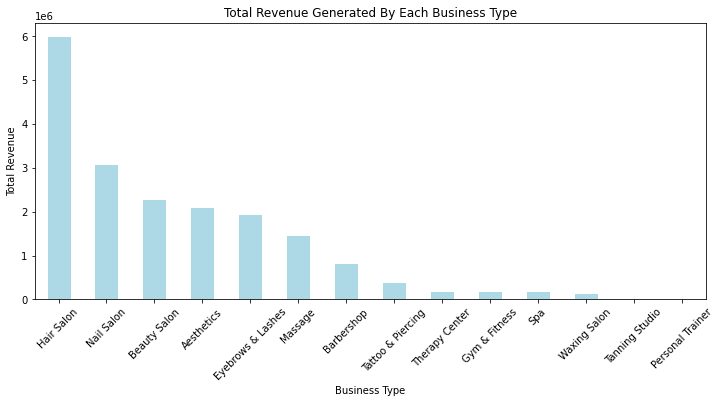

In [17]:
business_type_total_revenue = business_type_total_revenue.drop('Unknown')
business_type_total_revenue = business_type_total_revenue.drop('Total_Revenue')

business_type_total_revenue = business_type_total_revenue.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
business_type_total_revenue.plot(kind='bar', color='lightblue', edgecolor='white', legend=False)


plt.title('Total Revenue Generated By Each Business Type')
plt.xlabel('Business Type')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.xticks(rotation=45)

plt.savefig('Total_Revenue_by_Business_Type.png', dpi=300)


plt.show()

In [18]:
revenue_per_country_per_business_hairdressers_barbers = revenue_per_country_per_business[["Hair Salon", "Barbershop"]]
revenue_per_country_per_business_hairdressers_barbers

BUSINESS_TYPE,Hair Salon,Barbershop
COUNTRY_CODE,,
AU,1429713.88,279283.39
CA,673300.36,31094.48
GB,2279617.87,231378.59
IE,115287.26,17687.31
NZ,30569.84,32072.67
PR,39873.43,6957.07
SG,36540.51,0.00
US,1397786.83,228060.46
Total Revenue,6002689.98,826533.97


In [19]:
business_type_counts_hairdressers_barbershops = business_type_counts[["Hair Salon", "Barbershop"]]
business_type_counts_hairdressers_barbershops

BUSINESS_TYPE,Hair Salon,Barbershop
COUNTRY_CODE,,
AU,136,24
CA,71,9
GB,359,37
IE,17,4
NZ,8,4
PR,4,1
SG,2,0
US,173,21


In [20]:
divisors_array = np.array([25.7, 37.7, 67.9, 4.94, 4.82, 3.19, 5.69, 331, 1]).reshape(-1, 1)

avg_revenue_per_pop = revenue_per_country_per_business.div(divisors_array).round(2)
avg_revenue_per_pop = avg_revenue_per_pop.rename(columns={'Total_Revenue': 'Revenue Per Pop'})
avg_revenue_per_pop

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon,Revenue Per Pop
COUNTRY_CODE,,,,,,,,,,,,,,,,
AU,2970.46,10867.06,14817.60,17797.05,768.55,55630.89,16026.95,12372.89,0.00,1507.20,243.81,3816.75,1792.78,0.00,885.96,139497.95
CA,916.05,824.79,9130.37,6377.04,123.99,17859.43,2850.17,9846.80,0.00,2181.80,0.00,1127.46,1622.36,0.00,986.65,53846.91
GB,4119.62,3407.64,16190.54,12967.72,1304.14,33573.16,6205.38,18381.19,0.00,176.58,317.99,2294.49,524.77,13.45,812.81,100289.49
IE,644.24,3580.43,27250.68,8329.05,989.57,23337.50,7280.87,25294.13,0.00,0.00,727.22,0.00,1208.40,0.00,1746.86,100388.95
NZ,323825.21,6654.08,10749.05,6818.93,10552.67,6342.29,16050.11,4889.84,0.00,0.00,797.64,1268.34,1433.04,0.00,0.00,389381.20
PR,66.29,2180.90,5892.57,1626.77,0.00,12499.51,4791.29,15394.60,0.00,0.00,0.00,1354.41,0.00,0.00,2229.91,46036.25
SG,0.00,0.00,5035.18,465.74,396.76,6421.88,153.46,1064.53,0.00,0.00,0.00,3601.46,0.00,0.00,0.00,17139.02
US,445.62,689.00,699.46,877.57,39.82,4222.92,1221.66,2816.22,88.01,149.06,15.38,183.64,113.70,0.00,58.44,11620.49
Total Revenue,2102330.88,826533.97,2289762.21,1950635.36,184166.97,6002689.98,1474545.97,3073145.61,29130.20,182317.10,40384.86,388101.47,193379.89,913.40,150243.14,18888281.00


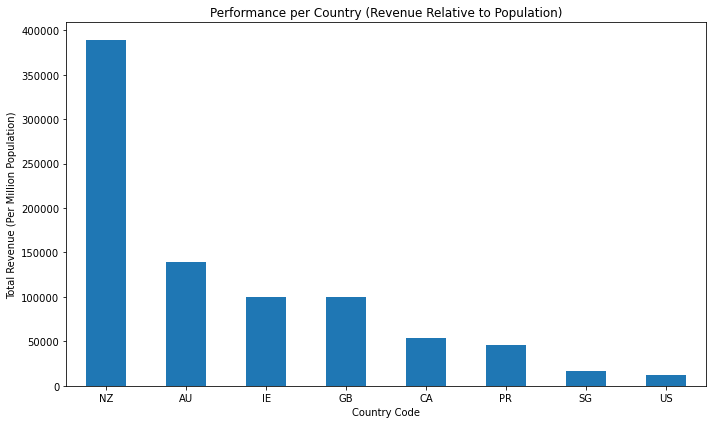

In [21]:

avg_revenue_per_pop = avg_revenue_per_pop.sort_values('Revenue Per Pop', ascending=False)
avg_revenue_per_pop = avg_revenue_per_pop[1:9]
avg_revenue_per_pop.plot(y='Revenue Per Pop', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Total Revenue (Per Million Population)')
plt.xticks(rotation=0)
plt.savefig('Performance per Country.png', dpi=300)
plt.tight_layout()

In [22]:
revenue_per_country_per_business_2 = data.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].sum().unstack(fill_value=0)
revenue_per_country_per_business_2_no_aesthetics = revenue_per_country_per_business_2.drop("Aesthetics", axis = 1)
country_total_revenue_2 = revenue_per_country_per_business_2_no_aesthetics.sum(axis=1)
revenue_per_country_per_business_2_no_aesthetics['Total_Revenue'] = country_total_revenue_2
divisors_array = np.array([25.7, 37.7, 67.9, 4.94, 4.82, 3.19, 5.69, 331]).reshape(-1, 1)

avg_revenue_per_pop_no_aestheticians = revenue_per_country_per_business_2_no_aesthetics.div(divisors_array).round(2)
avg_revenue_per_pop_no_aestheticians = avg_revenue_per_pop_no_aestheticians.rename(columns={'Total_Revenue': 'Revenue Per Pop'})
avg_revenue_per_pop_no_aestheticians

BUSINESS_TYPE,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon,Revenue Per Pop
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,10867.06,14817.60,17797.05,768.55,55630.89,16026.95,12372.89,0.00,1507.20,243.81,3816.75,1792.78,0.00,885.96,136527.49
CA,824.79,9130.37,6377.04,123.99,17859.43,2850.17,9846.80,0.00,2181.80,0.00,1127.46,1622.36,0.00,986.65,52930.85
GB,3407.64,16190.54,12967.72,1304.14,33573.16,6205.38,18381.19,0.00,176.58,318.00,2294.49,524.77,13.45,812.81,96169.87
IE,3580.43,27250.68,8329.05,989.57,23337.50,7280.87,25294.13,0.00,0.00,727.22,0.00,1208.41,0.00,1746.86,99744.71
NZ,6654.08,10749.05,6818.93,10552.67,6342.29,16050.11,4889.84,0.00,0.00,797.64,1268.34,1433.04,0.00,0.00,65556.00
PR,2180.90,5892.57,1626.77,0.00,12499.51,4791.30,15394.60,0.00,0.00,0.00,1354.41,0.00,0.00,2229.91,45969.96
SG,0.00,5035.18,465.74,396.76,6421.88,153.46,1064.53,0.00,0.00,0.00,3601.46,0.00,0.00,0.00,17139.02
US,689.00,699.46,877.57,39.82,4222.92,1221.66,2816.22,88.01,149.06,15.38,183.64,113.70,0.00,58.44,11174.87


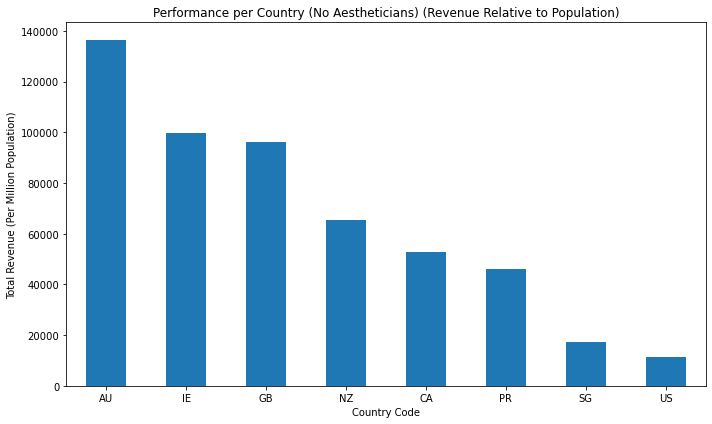

In [23]:
avg_revenue_per_pop_no_aestheticians = avg_revenue_per_pop_no_aestheticians.sort_values('Revenue Per Pop', ascending=False)
avg_revenue_per_pop_no_aestheticians.plot(y='Revenue Per Pop', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country (No Aestheticians) (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Total Revenue (Per Million Population)')
plt.xticks(rotation=0)
plt.savefig('Performance per Country No Aestheticians.png', dpi=300)
plt.tight_layout()

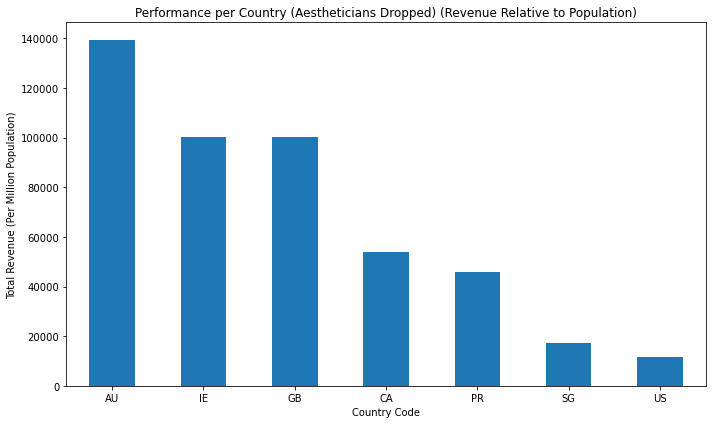

In [24]:
avg_revenue_per_pop = avg_revenue_per_pop.sort_values('Revenue Per Pop', ascending=False)
avg_revenue_per_pop = avg_revenue_per_pop[1:9]
avg_revenue_per_pop.plot(y='Revenue Per Pop', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country (Aestheticians Dropped) (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Total Revenue (Per Million Population)')
plt.savefig('Performance per Country Aestheticians Dropped.png', dpi=300)
plt.xticks(rotation=0)
plt.tight_layout()

<h3> Analysis of highest performings business types:

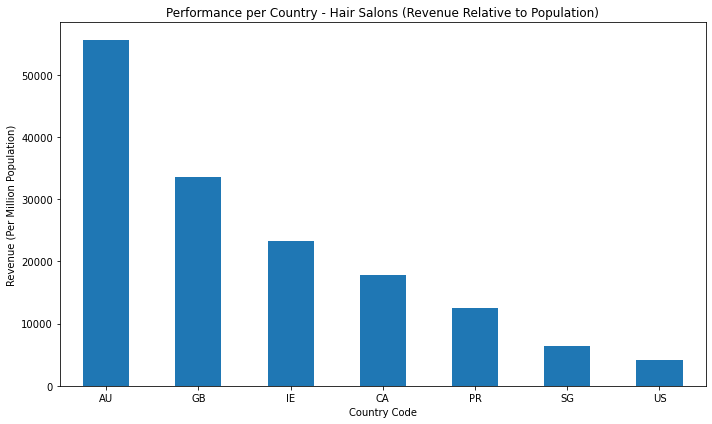

In [25]:
avg_revenue_per_pop = avg_revenue_per_pop.sort_values('Hair Salon', ascending=False)
avg_revenue_per_pop.plot(y='Hair Salon', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country - Hair Salons (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Revenue (Per Million Population)')
plt.xticks(rotation=0)
plt.tight_layout()

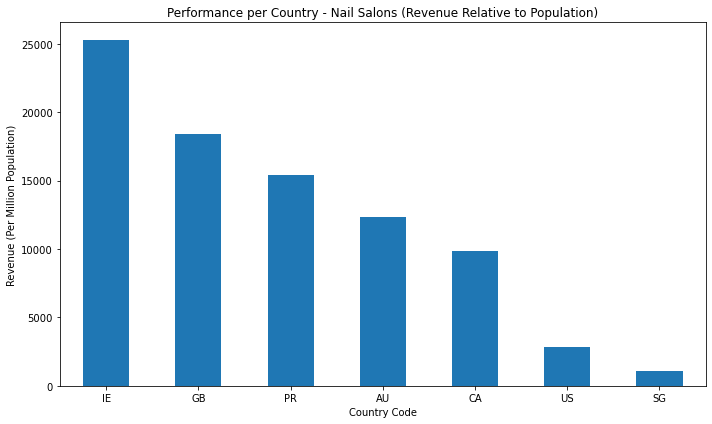

In [26]:
avg_revenue_per_pop = avg_revenue_per_pop.sort_values('Nail Salon', ascending=False)
avg_revenue_per_pop.plot(y='Nail Salon', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country - Nail Salons (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Revenue (Per Million Population)')
plt.xticks(rotation=0)
plt.tight_layout()

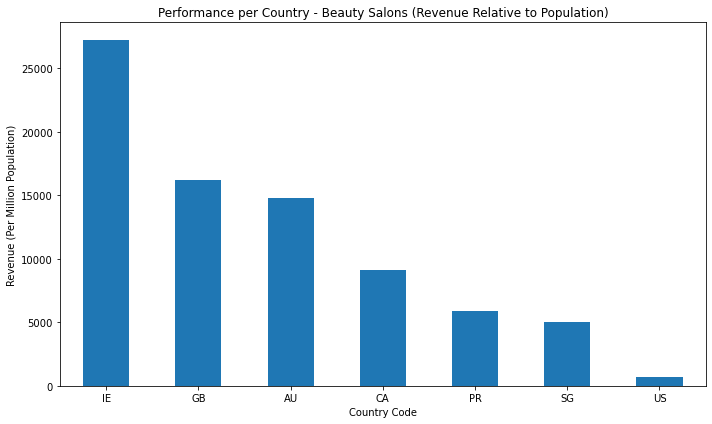

In [27]:
avg_revenue_per_pop = avg_revenue_per_pop.sort_values('Beauty Salon', ascending=False)
avg_revenue_per_pop.plot(y='Beauty Salon', kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country - Beauty Salons (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Revenue (Per Million Population)')
plt.xticks(rotation=0)
plt.tight_layout()


Overall, we can see that the US should be a priority for expansion, along with Singapore, Puerto Rico and Canada.
My assumption is that each country has a fairly similar demand for salons and therefore, rather than Ireland (as in the graph above) having particularly high usage of beauty salons, we have just tapped into more potential of Irelands' markets as opposed to the other markets seen in the graph above.

<h2> Hair salon - Barbershop divide

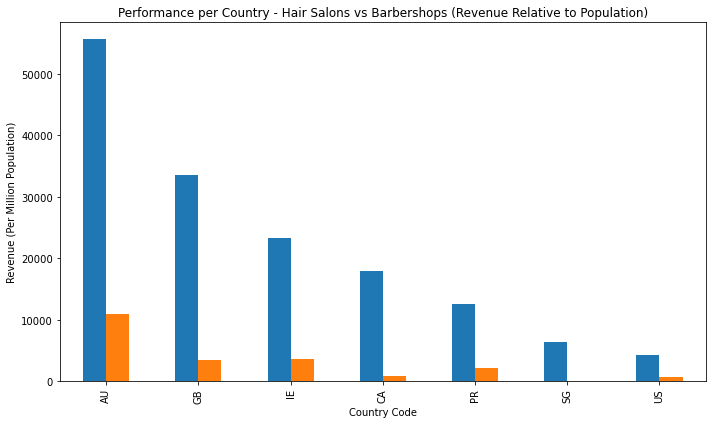

In [28]:
avg_revenue_per_pop = avg_revenue_per_pop.sort_values(['Hair Salon'], ascending=False)
avg_revenue_per_pop.plot(y=['Hair Salon', 'Barbershop'], kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance per Country - Hair Salons vs Barbershops (Revenue Relative to Population)')
plt.xlabel('Country Code')
plt.ylabel('Revenue (Per Million Population)')

plt.savefig('Hair Salon = Barbershop Divide', dpi=300)
plt.tight_layout()

- Barbershops and hair salons should have very similar markets and therefore we should be seeing a similar revenue stream coming from both
- Therefore this graph shows an untapped barbershop market
- This graph could probably be put down to Men not feeling the need to book for haircuts, as most barbershops provide a walk-in service where men wait to get a haircut
- This also may be indicative of an underlying problem with Fresha, particularly catering to women, through branding or marketing strategy
- Therefore we should reasses marketing towards men

- Also very interesting how New Zealand seems to have a similar level of barbershop and hair salon revenues, further enforcing that 

Assuming that each country has similar markets, with number of available businesses - the "market cap" - being proportional to the size of the country ie having a similar number of salons per 1000 people, the above table may be useful in identifying key countries for growth.

This table is also using the maximum of each column as the divisor for normalisation. Given more data, ie data for the total number of salons in a country, rather than the total number of salons using Fresha, we . This table works, assuming atleast one country per column is at or near its market cap.

This chart assumes:
-
-

I also dropped columns of less common business types to negate skewing when calculating the mean.

Though these assumptions are fairly crude, I think they hold a significant level of validity and therefore this chart can be used as a good, first-stage approximation.

Actions to take and metrics to use in evaluation:
- We should expand into _ and _
-

<h3> High Performers

Now that we know which countries we need to develop acquisitions in, it'd be useful to get an understanding of high performing areas.

Starting with high revenue business types across different countries:

In [29]:
revenue_per_country_per_business = data.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].sum().unstack(fill_value=0)
revenue_per_country_per_business.round(2)

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,76340.81,279283.39,380812.28,457384.28,19751.83,1429713.88,411892.57,317983.29,0.0,38735.10,6266.00,98090.49,46074.44,0.0,22769.09
CA,34535.13,31094.48,344215.12,240414.32,4674.39,673300.36,107451.52,371224.19,0.0,82253.93,0.00,42505.14,61163.05,0.0,37196.71
GB,279722.39,231378.59,1099337.62,880508.26,88551.38,2279617.87,421345.60,1248082.57,0.0,11989.87,21591.86,155795.55,35631.80,913.4,55189.78
IE,3182.57,17687.31,134618.36,41145.50,4888.48,115287.26,35967.50,124952.99,0.0,0.00,3592.45,0.00,5969.52,0.0,8629.49
NZ,1560837.49,32072.67,51810.42,32867.24,50863.88,30569.84,77361.53,23569.01,0.0,0.00,3844.62,6113.41,6907.27,0.0,0.00
PR,211.47,6957.07,18797.29,5189.39,0.00,39873.43,15284.23,49108.78,0.0,0.00,0.00,4320.57,0.00,0.0,7113.41
SG,0.00,0.00,28650.20,2650.04,2257.58,36540.51,873.18,6057.18,0.0,0.00,0.00,20492.32,0.00,0.0,0.00
US,147501.02,228060.46,231520.93,290476.33,13179.43,1397786.83,404369.84,932167.61,29130.2,49338.19,5089.92,60783.97,37633.81,0.0,19344.65


We can see the total revenue for each business type in each country above

In [30]:
divisors_array = np.array([25.7, 37.7, 67.9, 4.94, 4.82, 3.19, 5.69, 331]).reshape(-1, 1)

avg_revenue_per_pop = revenue_per_country_per_business.div(divisors_array).round(2)
avg_revenue_per_pop

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,2970.46,10867.06,14817.60,17797.05,768.55,55630.89,16026.95,12372.89,0.00,1507.20,243.81,3816.75,1792.78,0.00,885.96
CA,916.05,824.79,9130.37,6377.04,123.99,17859.43,2850.17,9846.80,0.00,2181.80,0.00,1127.46,1622.36,0.00,986.65
GB,4119.62,3407.64,16190.54,12967.72,1304.14,33573.16,6205.38,18381.19,0.00,176.58,318.00,2294.49,524.77,13.45,812.81
IE,644.24,3580.43,27250.68,8329.05,989.57,23337.50,7280.87,25294.13,0.00,0.00,727.22,0.00,1208.41,0.00,1746.86
NZ,323825.20,6654.08,10749.05,6818.93,10552.67,6342.29,16050.11,4889.84,0.00,0.00,797.64,1268.34,1433.04,0.00,0.00
PR,66.29,2180.90,5892.57,1626.77,0.00,12499.51,4791.30,15394.60,0.00,0.00,0.00,1354.41,0.00,0.00,2229.91
SG,0.00,0.00,5035.18,465.74,396.76,6421.88,153.46,1064.53,0.00,0.00,0.00,3601.46,0.00,0.00,0.00
US,445.62,689.00,699.46,877.57,39.82,4222.92,1221.66,2816.22,88.01,149.06,15.38,183.64,113.70,0.00,58.44


Above we can see another way of assessing market share, by total revenue divided by country populations. The table above shows the revenue for each sector per million population. We can see that per million people in New Zealand, Fresha generates ~$300,000 monthly revenue

In [31]:
avg_revenue_per_business = revenue_per_country_per_business/business_type_counts
avg_revenue_per_business

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,6361.734532,11636.808025,6142.133501,3780.035350,2821.689609,10512.602033,7355.224376,6765.601937,NaN,9683.773805,1566.499620,9809.049222,6582.062244,NaN,2846.136147
CA,4933.590510,3454.942600,8005.002696,3588.273368,4674.390675,9483.103646,8265.501316,7138.926660,NaN,13708.988606,NaN,3864.103605,20387.684885,NaN,6199.451675
GB,8476.436129,6253.475345,5019.806487,3201.848236,4660.599173,6349.910508,4256.016137,3535.644680,NaN,5994.936760,2698.982878,5372.260480,2545.128511,913.401717,3246.457740
IE,3182.566255,4421.826785,8974.557581,3428.791683,4888.477438,6781.603559,2997.291875,5206.374497,NaN,NaN,3592.451084,NaN,1989.840872,NaN,4314.746359
NZ,31853.826251,8018.167405,7401.488901,2987.931039,10172.776576,3821.229672,7032.866793,3367.000889,NaN,NaN,3844.620635,3056.706391,2302.424400,NaN,NaN
PR,211.470775,6957.069011,2349.660840,2594.692754,NaN,9968.357230,5094.744920,4910.877541,NaN,NaN,NaN,4320.574734,NaN,NaN,7113.413156
SG,NaN,NaN,9550.065084,2650.041636,2257.575355,18270.254519,873.176927,3028.590222,NaN,NaN,NaN,20492.324990,NaN,NaN,NaN
US,16389.002023,10860.021964,5384.207592,5281.387850,2635.886655,8079.692682,8087.396778,7967.244530,29130.19763,4933.819476,2544.961554,5525.815876,9408.451508,NaN,3868.930047


Let's investigate whether the higher performers seen above are representative of the whole market or if they are just due to Fresha only currently being used by larger businesses. 

In [32]:
data["STAFF"].unique()

array(['Individual', '2-5 Staff', '6+ Staff', nan], dtype=object)

In [33]:
data.dropna()

,BUSINESS_TYPE,STAFF,COUNTRY_CODE,MONTHLY_REVENUE
0,Nail Salon,Individual,GB,1646.567381
1,Hair Salon,Individual,GB,13600.083130
2,Massage,Individual,GB,4118.980504
3,Nail Salon,Individual,US,2068.142086
4,Eyebrows & Lashes,Individual,AU,1735.191196
...,...,...,...,...
2995,Nail Salon,Individual,AU,2769.034328
2996,Eyebrows & Lashes,Individual,CA,720.470535
2997,Nail Salon,Individual,AU,2989.012162
2998,Hair Salon,Individual,GB,1800.672356


In [34]:
replacements = {
    'Individual' : 1,
    '2-5 Staff' : 3,
    '6+ Staff' : 6
}

data["BUSINESS_SIZE"] = data["STAFF"].replace(replacements)

Converted the staff counts to numbers. Approximated 2-5 staff as a middle value - 3 and any business with 6+ staff as 6

In [35]:
average_business_size = data.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["BUSINESS_SIZE"].mean().unstack(fill_value=0)
average_business_size

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,1.333333,1.666667,1.709677,1.132231,1.857143,1.808824,2.571429,1.936170,0.0,3.250000,1.5,2.200000,1.571429,0.0,1.250000
CA,2.142857,1.666667,2.209302,1.208955,3.000000,2.126761,2.692308,2.442308,0.0,3.333333,0.0,1.727273,2.666667,0.0,1.333333
GB,1.424242,1.594595,1.433790,1.120000,1.315789,1.618384,1.505051,1.220963,0.0,4.500000,1.5,1.896552,1.285714,NaN,1.235294
IE,1.000000,1.500000,1.266667,1.500000,1.000000,1.470588,1.166667,1.500000,0.0,0.000000,1.0,0.000000,1.000000,0.0,2.000000
NZ,4.591837,1.500000,1.285714,1.363636,2.800000,2.375000,1.909091,2.714286,0.0,0.000000,1.0,3.500000,1.000000,0.0,0.000000
PR,3.000000,1.000000,1.250000,2.000000,0.000000,4.750000,1.666667,1.400000,0.0,0.000000,0.0,3.000000,0.000000,0.0,1.000000
SG,0.000000,0.000000,3.000000,1.000000,3.000000,3.000000,3.000000,4.500000,0.0,0.000000,0.0,3.000000,0.000000,0.0,0.000000
US,2.222222,2.142857,1.860465,1.727273,1.400000,1.832370,2.520000,2.017094,3.0,2.100000,2.0,2.000000,2.750000,0.0,2.400000


In [36]:
business_type_normalised_revenues = avg_revenue_per_business/average_business_size
business_type_normalised_revenues

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Personal Trainer,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Unknown,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,,,
AU,4771.300899,6982.084815,3592.568652,3338.571368,1519.371328,5811.845026,2860.365035,3494.321880,NaN,2979.622709,1044.333080,4458.658737,4188.585065,NaN,2276.908918
CA,2302.342238,2072.965560,3623.317010,2968.077971,1558.130225,4458.942774,3070.043346,2923.025089,NaN,4112.696582,NaN,2237.112613,7645.381832,NaN,4649.588757
GB,5951.540261,3921.670979,3501.075225,2858.793068,3542.055371,3923.610796,2827.822803,2895.783230,NaN,1332.208169,1799.321919,2832.646435,1979.544398,NaN,2628.084837
IE,3182.566255,2947.884524,7085.177037,2285.861122,4888.477438,4611.490420,2569.107321,3470.916331,NaN,NaN,3592.451084,NaN,1989.840872,NaN,2157.373180
NZ,6937.055495,5345.444937,5756.713590,2191.149428,3633.134492,1608.938809,3683.882606,1240.474012,NaN,NaN,3844.620635,873.344683,2302.424400,NaN,NaN
PR,70.490258,6957.069011,1879.728672,1297.346377,NaN,2098.601522,3056.846952,3507.769672,NaN,NaN,NaN,1440.191578,NaN,NaN,7113.413156
SG,NaN,NaN,3183.355028,2650.041636,752.525118,6090.084840,291.058976,673.020049,NaN,NaN,NaN,6830.774997,NaN,NaN,NaN
US,7375.050910,5068.010250,2894.011581,3057.645598,1882.776182,4409.422189,3209.284436,3949.862754,9710.065877,2349.437846,1272.480777,2762.907938,3421.255094,NaN,1612.054186


The table above shows us the average revenue per business, adjusted for average business size. From this we can get a much better idea of how well each business type performs which would be useful for prioritising areas of business acquisition. For example, it'd be much more time efficient to gain a new 'aesthetics' partner, as opposed to 4 'eyebrows and lashes' partners

In [37]:
business_type_normalised_revenues.columns
business_type_normalised_revenues = business_type_normalised_revenues.drop("Unknown", axis=1)
business_type_normalised_revenues = business_type_normalised_revenues.drop("Personal Trainer", axis=1)

In [38]:

styled_table = business_type_normalised_revenues.style\
    .set_table_styles(
        [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]},
         {'selector': 'td', 'props': [('border', '1px solid black')]}]
    )\
    .set_properties(**{'text-align': 'center'})\
    .format("{:.3f}")\
    .background_gradient(cmap='Greys')\
    .highlight_null(null_color='white')\
    .set_table_styles(
        [{'selector': 'td', 'props': [('width', '60px')]},
         {'selector': 'th', 'props': [('width', '60px')]}]
    )

styled_table

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,
AU,4771.301,6982.085,3592.569,3338.571,1519.371,5811.845,2860.365,3494.322,2979.623,1044.333,4458.659,4188.585,2276.909
CA,2302.342,2072.966,3623.317,2968.078,1558.130,4458.943,3070.043,2923.025,4112.697,nan,2237.113,7645.382,4649.589
GB,5951.540,3921.671,3501.075,2858.793,3542.055,3923.611,2827.823,2895.783,1332.208,1799.322,2832.646,1979.544,2628.085
IE,3182.566,2947.885,7085.177,2285.861,4888.477,4611.490,2569.107,3470.916,nan,3592.451,nan,1989.841,2157.373
NZ,6937.055,5345.445,5756.714,2191.149,3633.134,1608.939,3683.883,1240.474,nan,3844.621,873.345,2302.424,nan
PR,70.490,6957.069,1879.729,1297.346,nan,2098.602,3056.847,3507.770,nan,nan,1440.192,nan,7113.413
SG,nan,nan,3183.355,2650.042,752.525,6090.085,291.059,673.020,nan,nan,6830.775,nan,nan
US,7375.051,5068.010,2894.012,3057.646,1882.776,4409.422,3209.284,3949.863,2349.438,1272.481,2762.908,3421.255,1612.054


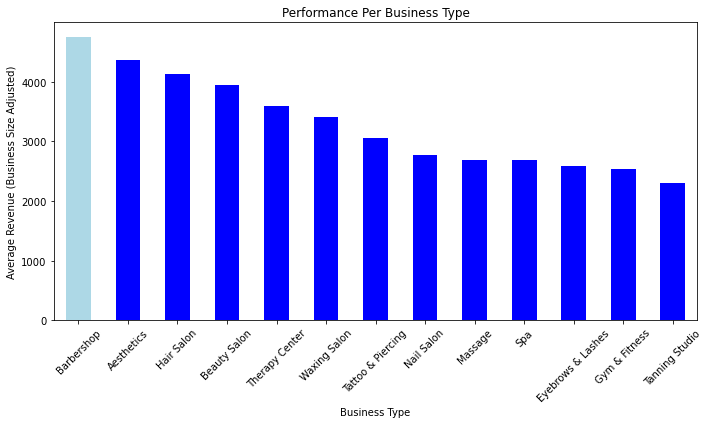

In [39]:
business_type_average_revenue = business_type_normalised_revenues.mean(axis=0)
business_type_normalised_revenues.loc[len(business_type_normalised_revenues.index)] = business_type_average_revenue
#business_type_average_revenue = business_type_average_revenue.rename(index={8: 'Average Revenue'})
#business_type_average_revenue = business_type_average_revenue.drop("Unknown")
business_type_average_revenue = business_type_average_revenue.sort_values(ascending=False)
colors = ['lightblue'] + ['blue'] * (len(business_type_average_revenue) - 1)
business_type_average_revenue.plot(y=['BUSINESS_TYPE'], color = colors, kind='bar', figsize=(10, 6), legend = False)
plt.title('Performance Per Business Type')
plt.xlabel('Business Type')
plt.ylabel('Average Revenue (Business Size Adjusted)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('performance_per_business_type.png', dpi=300)




<h1> Box plots for each country's business size distributions:

Smaller businesses will probably be harder to reach, therefore it's important to get an understanding of which countries we need to do more in-depth searching for potential partners

As our revenue is directly derived from our partners' revenues, our business is dependant on the salon industry and the individuals within it. For this reason, it's important to get an ide

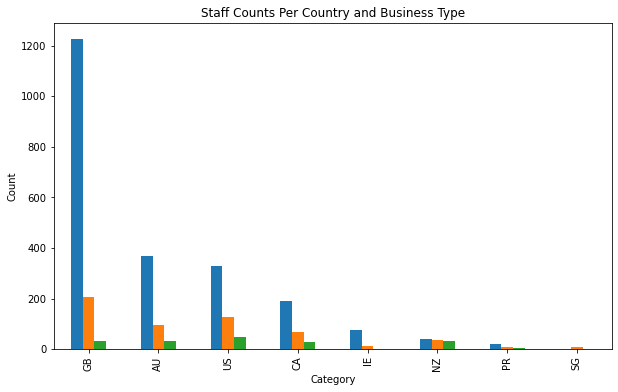

In [40]:
business_size_count = data.groupby(['COUNTRY_CODE', 'STAFF'])["STAFF"].count().unstack(fill_value=0)
new_column_order = ['Individual', '2-5 Staff', '6+ Staff']

business_size_count = business_size_count[new_column_order]
business_size_count

business_size_count = business_size_count.sort_values(by='Individual', ascending=False)

business_size_count.plot(y=['Individual', '2-5 Staff', '6+ Staff'], kind='bar', figsize=(10, 6), legend = False)




plt.title('Staff Counts Per Country and Business Type')
plt.xlabel('Category')
plt.ylabel('Count')

plt.savefig('performance_per_business_type_per_country.png', dpi=300)



We are doing a great job of finding small businesses in the UK - hopefully this isn't indicative of higher fraud in the UK

In [41]:
business_size_total_revenues = data.groupby(['COUNTRY_CODE', 'BUSINESS_SIZE'])["MONTHLY_REVENUE"].sum().unstack(fill_value=0)
business_size_total_revenues_and_average = business_size_total_revenues.mean(axis=0)
business_size_total_revenues.loc[len(business_type_normalised_revenues.index)] = business_size_total_revenues_and_average
business_size_total_revenues_and_average.round(0)

BUSINESS_SIZE
1.0    1079683.0
3.0     728117.0
6.0     553121.0
dtype: float64

<h2> Business size distribution curve for all countries: (is it bell shaped (normally distributed)? or power law shaped?) use this to then approximate a good estimation for the 2-5 people business size (ie a power law shape would lean towards 3, but a bell would be 3.5 or 4) and 6+ 
    
I can then use these approximations to build a regression model (not ML, just a statsmodels regression model)

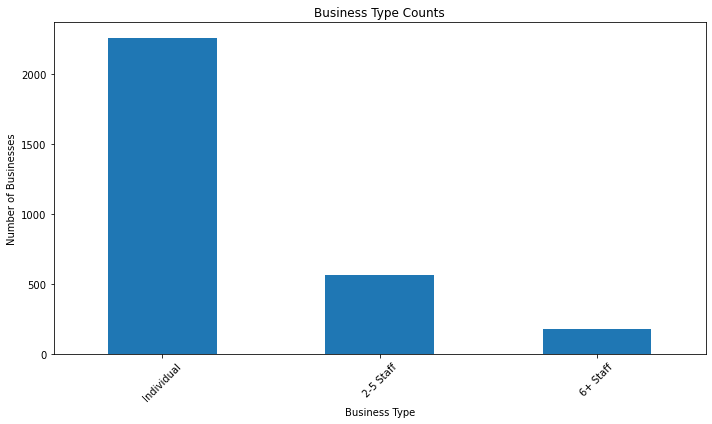

In [42]:
data["STAFF"].value_counts().plot(y=['BUSINESS_TYPE'], kind='bar', figsize=(10, 6), legend = False)
plt.title('Business Type Counts')
plt.xlabel('Business Type')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Business Type Counts.png', dpi=300)



-This relationship seems easy to explain - there's going to be more small businesses than large ones in general. However, this graph may also be indicative of the userbase Fresha attracts. Maybe Companies with 6+ staff don't have a need for a booking app as they can have a staff member handle bookings.

In [43]:

data_highest_revenues = data[(data["MONTHLY_REVENUE"] > 60000) & (data["STAFF"] == "6+ Staff")]
data_highest_revenues.sort_values(by = "MONTHLY_REVENUE", ascending = False)

,BUSINESS_TYPE,STAFF,COUNTRY_CODE,MONTHLY_REVENUE,BUSINESS_SIZE
484,Hair Salon,6+ Staff,US,73966.09735,6.0
2417,Hair Salon,6+ Staff,AU,73107.06289,6.0
2691,Hair Salon,6+ Staff,GB,71423.74477,6.0
1699,Nail Salon,6+ Staff,CA,70431.88397,6.0
1382,Barbershop,6+ Staff,US,67398.46899,6.0
21,Nail Salon,6+ Staff,US,67239.59403,6.0
1822,Hair Salon,6+ Staff,AU,66376.85256,6.0
748,Eyebrows & Lashes,6+ Staff,US,66242.47433,6.0
915,Hair Salon,6+ Staff,US,65543.20763,6.0
2075,Hair Salon,6+ Staff,AU,65485.77212,6.0


In [44]:
revenue_per_country_per_business = data.groupby(['BUSINESS_SIZE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].mean().unstack(fill_value=0)
revenue_per_country_per_business["Average_Revenue"] = revenue_per_country_per_business.mean(axis=1)
revenue_per_country_per_business.round(2)
revenue_per_country_per_business

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Waxing Salon,Personal Trainer,Average_Revenue
BUSINESS_SIZE,,,,,,,,,,,,,,,
1.0,4802.290435,4281.396087,3897.029170,3261.207421,3885.866214,4721.807240,3510.897948,3426.771542,2832.335367,2531.305030,3555.177716,2749.963844,3576.978772,0.00000,3359.501913
3.0,19180.295259,15218.243314,9216.582041,5590.312873,5231.189038,12814.012337,7780.306531,7939.365304,7463.256366,2502.298994,9103.699166,7636.043321,4640.165555,29130.19763,10246.140552
6.0,41445.037104,33957.445115,22651.201520,23288.957032,21705.503960,24344.211465,18005.943848,19965.433669,19424.005182,0.000000,13078.766928,40475.325490,7938.822895,0.00000,20448.618158


In [45]:
revenue_per_country_per_business.columns

Index(['Aesthetics', 'Barbershop', 'Beauty Salon', 'Eyebrows & Lashes',
       'Gym & Fitness', 'Hair Salon', 'Massage', 'Nail Salon', 'Spa',
       'Tanning Studio', 'Tattoo & Piercing', 'Therapy Center', 'Waxing Salon',
       'Personal Trainer', 'Average_Revenue'],
      dtype='object', name='BUSINESS_TYPE')

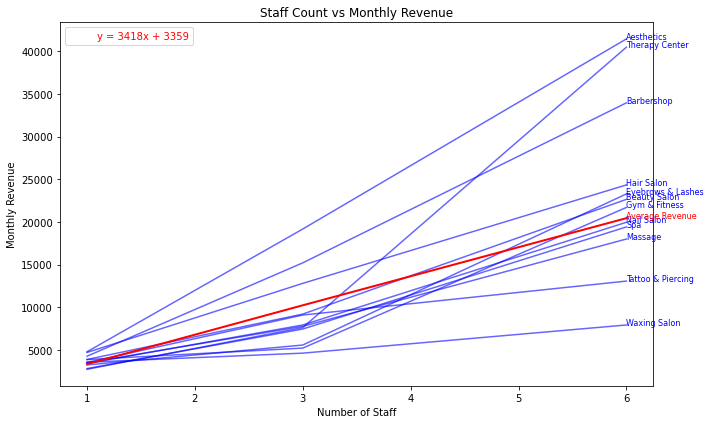

In [46]:
revenue_per_country_per_business = data.groupby(['BUSINESS_SIZE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].mean().unstack(fill_value=0)
revenue_per_country_per_business["Average_Revenue"] = revenue_per_country_per_business.mean(axis=1)
revenue_per_country_per_business = revenue_per_country_per_business.round(2)
revenue_per_country_per_business = revenue_per_country_per_business.drop(["Personal Trainer", "Tanning Studio"], axis=1)

plt.figure(figsize=(10, 6))

for column in revenue_per_country_per_business.columns:
    if column != "Average_Revenue":
        plt.plot(revenue_per_country_per_business.index, revenue_per_country_per_business[column], color='blue', alpha=0.6)
        plt.text(revenue_per_country_per_business.index[-1], revenue_per_country_per_business[column].iloc[-1], column, color='blue', fontsize=8)


X = np.arange(len(revenue_per_country_per_business.index)).reshape(-1, 1)
y = revenue_per_country_per_business["Average_Revenue"].values


plt.plot(revenue_per_country_per_business.index, revenue_per_country_per_business["Average_Revenue"], color='red', linewidth=2)
plt.text(revenue_per_country_per_business.index[-1], revenue_per_country_per_business["Average_Revenue"].iloc[-1], 'Average Revenue', color='red', fontsize=8)


plt.plot([], [], ' ', label=f'y = 3418x + 3359', color='red')

plt.title('Staff Count vs Monthly Revenue')
plt.xlabel('Number of Staff')
plt.ylabel('Monthly Revenue')


legend = plt.legend()
legend.get_texts()[-1].set_color("red")

plt.tight_layout()
plt.savefig('Staff Count vs Monthly Revenue.png', dpi=300)
plt.show()

In [47]:
(revenue_per_country_per_business["Average_Revenue"][6]- revenue_per_country_per_business["Average_Revenue"][1])/5

3417.8239999999996

<h3> 1-person small business analysis

The total revenue of different business types is going to be heavily weighted by how many small or large partners - of that business type - that Fresha has in that country. So, for a more comparable analysis of the performance of individual businesses, we can compare performance of business types in different countries, by solely 1 person businesses. We can rule out the classes of 2-5 person or 6+ person businesses to get a much more accurate picture of business performance.

Now we've shown that staff size has a clear relationship with revenue, and that over 2/3 of our partners are individuals, we can  analyse 1-person businesses in different countries for a more comparable analysis.


In [48]:
data_individuals = data[data["STAFF"] == "Individual"]
revenue_per_country_per_individual_business = data_individuals.groupby(['COUNTRY_CODE', 'BUSINESS_TYPE'])["MONTHLY_REVENUE"].mean().unstack(fill_value=0)
revenue_per_country_per_individual_business.round(2)

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,
AU,3568.56,5886.67,3412.33,3258.52,2900.08,5884.80,2922.30,2867.93,1810.11,1726.54,1546.12,3215.60,3022.53
CA,7432.00,3244.78,4158.00,3023.87,0.00,4633.82,2856.05,2992.98,1698.81,0.00,3224.55,3069.84,5744.66
GB,5247.53,3073.05,3803.86,3225.98,4635.68,4546.40,3441.58,3225.91,0.00,2311.15,4640.38,2783.41,3215.02
IE,3182.57,4727.28,10210.18,3124.40,4888.48,5371.25,2877.64,5323.77,0.00,3592.45,0.00,1989.84,2065.06
NZ,0.00,2984.04,2899.50,2287.64,2229.40,4567.90,5575.08,3241.35,0.00,3844.62,1936.81,2302.42,0.00
PR,0.00,6957.07,2393.29,2174.03,0.00,6436.73,3216.45,3178.33,0.00,0.00,0.00,0.00,7113.41
SG,0.00,0.00,0.00,2650.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
US,3700.63,5267.32,2736.65,4192.64,2449.98,4174.79,4701.98,4127.23,3380.55,3892.06,3180.51,2876.78,2392.83


In [49]:
styled_table = revenue_per_country_per_individual_business.style\
    .set_table_styles(
        [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]},
         {'selector': 'td', 'props': [('border', '1px solid black')]}]
    )\
    .set_properties(**{'text-align': 'center'})\
    .format("{:.3f}")\
    .background_gradient(cmap='Greys')\
    .highlight_null(null_color='white')\
    .set_table_styles(
        [{'selector': 'td', 'props': [('width', '60px')]},
         {'selector': 'th', 'props': [('width', '60px')]}]
    )

styled_table

BUSINESS_TYPE,Aesthetics,Barbershop,Beauty Salon,Eyebrows & Lashes,Gym & Fitness,Hair Salon,Massage,Nail Salon,Spa,Tanning Studio,Tattoo & Piercing,Therapy Center,Waxing Salon
COUNTRY_CODE,,,,,,,,,,,,,
AU,3568.562,5886.668,3412.329,3258.524,2900.081,5884.799,2922.301,2867.930,1810.110,1726.541,1546.121,3215.605,3022.531
CA,7431.997,3244.777,4157.997,3023.872,0.000,4633.816,2856.047,2992.982,1698.813,0.000,3224.547,3069.838,5744.663
GB,5247.529,3073.051,3803.862,3225.979,4635.678,4546.396,3441.577,3225.906,0.000,2311.152,4640.379,2783.413,3215.022
IE,3182.566,4727.284,10210.175,3124.397,4888.477,5371.249,2877.642,5323.770,0.000,3592.451,0.000,1989.841,2065.060
NZ,0.000,2984.036,2899.500,2287.637,2229.402,4567.896,5575.082,3241.354,0.000,3844.621,1936.813,2302.424,0.000
PR,0.000,6957.069,2393.289,2174.032,0.000,6436.732,3216.446,3178.328,0.000,0.000,0.000,0.000,7113.413
SG,0.000,0.000,0.000,2650.042,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
US,3700.627,5267.319,2736.650,4192.641,2449.983,4174.788,4701.979,4127.230,3380.547,3892.057,3180.514,2876.784,2392.827


In [50]:
flattened_data = revenue_per_country_per_individual_business.values.flatten() 
flattened_data = flattened_data[flattened_data != 0]
print(np.mean(flattened_data))
print(np.std(flattened_data))

3700.850895198672
1501.7275425929342


In [51]:
data_individuals_lowest_revenues = data_individuals[data_individuals["MONTHLY_REVENUE"] < 1840]
data_individuals_lowest_revenues.count()

BUSINESS_TYPE      703
STAFF              703
COUNTRY_CODE       703
MONTHLY_REVENUE    703
BUSINESS_SIZE      703
dtype: int64

In [52]:
data_lowest_revenues = data[data["MONTHLY_REVENUE"] < 1840]
data_lowest_revenues.count()

BUSINESS_TYPE      826
STAFF              825
COUNTRY_CODE       826
MONTHLY_REVENUE    826
BUSINESS_SIZE      825
dtype: int64

As our revenue is directly derived from our partners' revenues, our business is dependant on the salon industry and the individuals within in. For this reason, it's important to 

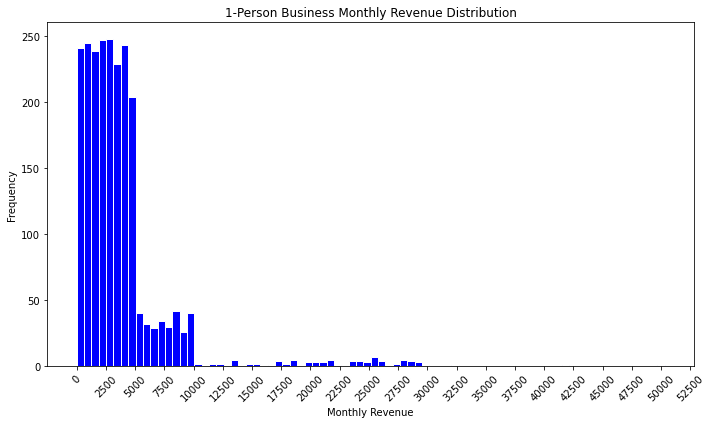

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(data_individuals["MONTHLY_REVENUE"], bins=80, color='blue', edgecolor='white')


plt.title('1-Person Business Monthly Revenue Distribution')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 55000, 2500))
plt.xticks(rotation=45)
plt.savefig('1-Person Business Monthly Revenue Distribution.png', dpi=300)
plt.tight_layout()
plt.show()
